In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount("/content/gdrive")
# Path to the dataset zip file
dataset_path = '/content/gdrive/My Drive/lettuce'

# Extract the dataset

# Define categories based on the folder names
categories = ['-N', '-P', '-K', 'FN']

# Initialize empty lists to store images and labels
X = []
y = []

# Load images from each category folder
for category_index, category in enumerate(categories):
    folder_path = os.path.join('/content/gdrive/My Drive/lettuce', category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        X.append(img_array)
        y.append(category_index)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Convert labels to categorical one-hot encoding# to convert categorical values to computer data
y = to_categorical(y, num_classes=len(categories))#to reduce complexity

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))              # from convolutuon we obtain the features over images
model.add(MaxPooling2D((2, 2)))# to reduce complexity through size of matrix reduction
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))#128 kernal number and 3*3 is the kernal size
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))# recognation part
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))# to reduce over fitting to denoising
model.add(Dense(len(categories), activation='softmax'))# recognation part

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history =model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])
# model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

# Generate predictions for the validation set
predictions = model.predict(X_val)
y_pred = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(np.argmax(y_val, axis=1), y_pred, target_names=categories))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/100
32/32 [==============================] - 3s 30ms/step - loss: 1.1338 - accuracy: 0.4779 - val_loss: 0.7753 - val_accuracy: 0.6760
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 0.6084 - accuracy: 0.7490 - val_loss: 0.4221 - val_accuracy: 0.8560
Epoch 3/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3988 - accuracy: 0.8544 - val_loss: 0.2753 - val_accuracy: 0.8880
Epoch 4/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2065 - accuracy: 0.9287 - val_loss: 0.1543 - val_accuracy: 0.9560
Epoch 5/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1050 - accuracy: 0.9709 - val_loss: 0.1597 - val_accuracy: 0.9440
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0558 - accuracy: 0.9809 - val_loss: 0.1260 - val_accuracy: 0.9680
Epoch 7/100
32/32

8/8 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

          -N       0.96      1.00      0.98        76
          -P       0.95      0.95      0.95        82
          -K       0.97      0.94      0.95        77
          FN       1.00      1.00      1.00        15

    accuracy                           0.96       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.96      0.96      0.96       250



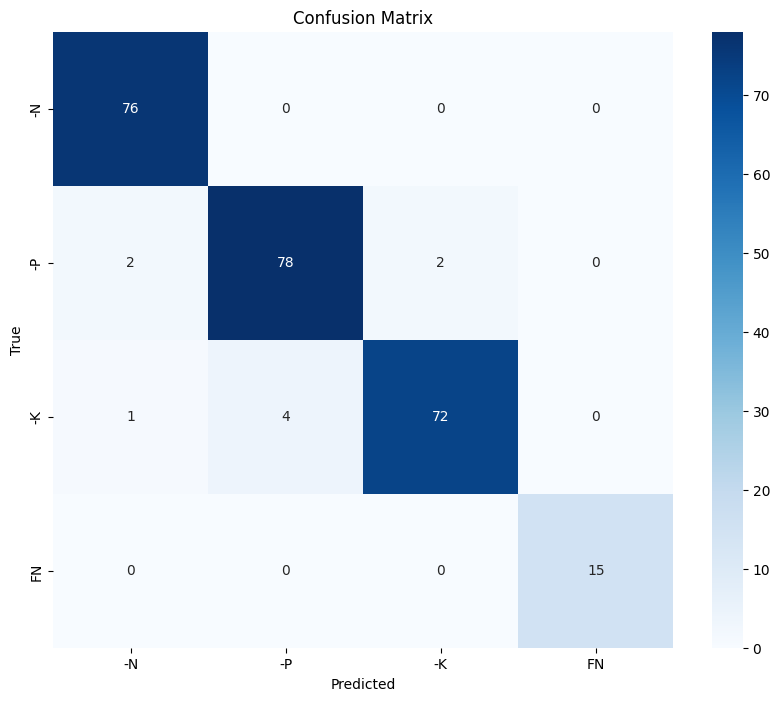

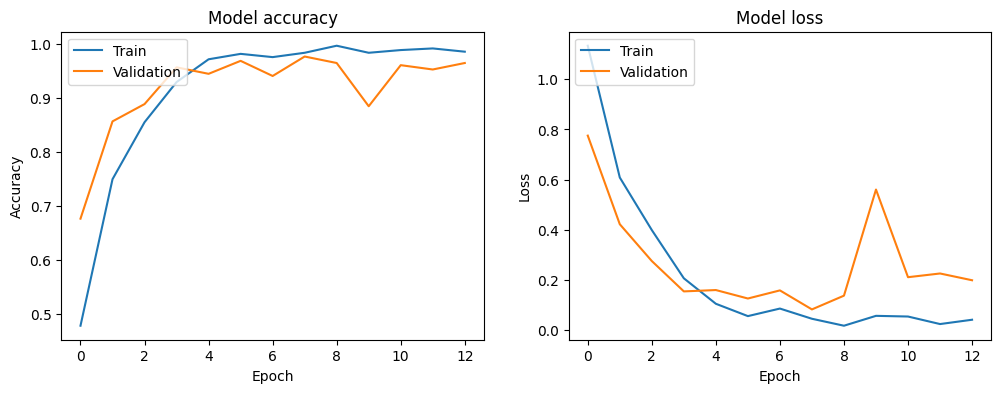

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
# Generate predictions for the validation set
predictions = model.predict(X_val)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_val, axis=1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=categories))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/gdrive/My Drive/lettuce_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import numpy as np
from keras.preprocessing import image

# Function to preprocess image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict nutrient deficiency
def predict_deficiency(image_path, model, categories):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)
    class_idx = np.argmax(prediction, axis=1)[0]
    if categories[class_idx] == 'FN':
        return "Plant is Healthier "
    elif categories[class_idx] == '-N':
        return "Plant is deficient in Nitrogen"
    elif categories[class_idx] == '-P':
        return "Plant is deficient in Phosphorous"
    elif categories[class_idx] == '-K':
        return "Plant is deficient in Potassium"
    else:
        return categories[class_idx]

# Example usage:
# Assuming 'model' and 'categories' are already defined and trained
image_path = '/content/gdrive/My Drive/k_1.png'  # Replace with your image path
result = predict_deficiency(image_path, model, categories)
print(f'The Lettuce {result} ')


1/1 [==============================] - 0s 227ms/step
The Lettuce Plant is deficient in Potassium 
